In [32]:
# Importing packages required
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns 
import matplotlib.pyplot as plt

In [33]:
# Read the 43 columns as defined in names
columns = np.arange(0,44) 
names = ["srcip", "srcport", "dstip", "dstport", "proto",
         "total_fpackets", "total_fvolume", "total_bpackets", "total_bvolume", "min_fpktl",
         "mean_fpktl", "max_fpktl", "std_fpktl", "min_bpktl", "mean_bpktl",
         "max_bpktl", "std_bkptl", "min_fiat", "mean_fiat", "max_fiat",
         "std_fiat", "min_biat", "mean_biat", "max_biat", "std_biat",
         "duration", "min_active", "mean_active", "max_active", "std_active",
         "min_idle", "mean_idle", "max_idle", "std_idle", "sflow_fpackets",
         "sflow_fbytes", "sflow_bpackets", "sflow_bbytes", "fpsh_cnt", "bpsh_cnt",
         "furg_cnt", "burg_cnt", "total_fhlen", "total_bhlen"]

# Load data for Zeus botnet
zeus_filename = "files/all_zeus.csv" 
# Load data when not a botnet
normal_filename = "files/all_normal.csv" 

In [34]:
# Loading the file data into dataframes
zeus_df = pd.read_csv(zeus_filename, usecols=columns, names=names) 

# As all examples in zeus file are botnets we assign the flag column as 1
zeus_df['is_botnet'] = 1 
print("Shape of zeus_df", zeus_df.shape) 
zeus_df.head()

Shape of zeus_df (524, 45)


,srcip,srcport,dstip,dstport,proto,total_fpackets,total_fvolume,total_bpackets,total_bvolume,min_fpktl,...,sflow_fbytes,sflow_bpackets,sflow_bbytes,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,is_botnet
0,10.0.2.19,1039,10.0.2.1,53,17,1,56,1,72,56,...,56,1,72,0,0,0,0,28,20,1
1,10.0.2.2,1037,239.255.255.250,1900,17,3,483,0,0,161,...,161,0,0,0,0,0,0,68,0,1
2,10.0.2.19,1033,239.255.255.250,1900,17,1,161,0,0,161,...,161,0,0,0,0,0,0,28,0,1
3,10.0.2.1,67,10.0.2.19,68,17,2,661,0,0,328,...,661,0,0,0,0,0,0,48,0,1
4,10.0.2.2,1033,239.255.255.250,1900,17,1,161,0,0,161,...,161,0,0,0,0,0,0,28,0,1


In [35]:
# Loading the file data into dataframes
normal_df = pd.read_csv(normal_filename, usecols=columns, names=names) 

# As all examples in normal file aren't botnets we assign the flag column as 0
normal_df['is_botnet'] = 0 
print("Shape of normal_df", normal_df.shape) 
normal_df.head()

Shape of normal_df (843, 45)


,srcip,srcport,dstip,dstport,proto,total_fpackets,total_fvolume,total_bpackets,total_bvolume,min_fpktl,...,sflow_fbytes,sflow_bpackets,sflow_bbytes,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,is_botnet
0,192.168.0.58,50245,216.58.213.99,443,6,5,729,3,1562,40,...,729,3,1562,1,0,0,0,212,132,0
1,192.168.0.58,50240,216.58.213.99,443,6,6,769,5,2990,40,...,769,5,2990,1,1,0,0,252,212,0
2,192.168.0.58,50239,216.58.213.99,443,6,6,769,5,2990,40,...,769,5,2990,1,1,0,0,252,212,0
3,192.168.0.58,50243,216.58.213.99,443,6,6,769,5,2990,40,...,769,5,2990,1,1,0,0,252,212,0
4,192.168.0.58,50261,216.58.206.78,443,6,6,769,5,3009,40,...,769,5,3009,1,1,0,0,252,212,0


In [36]:
data = pd.concat([zeus_df, normal_df])
print("Shape of data", data.shape) 
data.head()

Shape of data (1367, 45)


,srcip,srcport,dstip,dstport,proto,total_fpackets,total_fvolume,total_bpackets,total_bvolume,min_fpktl,...,sflow_fbytes,sflow_bpackets,sflow_bbytes,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,is_botnet
0,10.0.2.19,1039,10.0.2.1,53,17,1,56,1,72,56,...,56,1,72,0,0,0,0,28,20,1
1,10.0.2.2,1037,239.255.255.250,1900,17,3,483,0,0,161,...,161,0,0,0,0,0,0,68,0,1
2,10.0.2.19,1033,239.255.255.250,1900,17,1,161,0,0,161,...,161,0,0,0,0,0,0,28,0,1
3,10.0.2.1,67,10.0.2.19,68,17,2,661,0,0,328,...,661,0,0,0,0,0,0,48,0,1
4,10.0.2.2,1033,239.255.255.250,1900,17,1,161,0,0,161,...,161,0,0,0,0,0,0,28,0,1


In [37]:
data=data[['duration','max_active','max_biat','max_bpktl','max_fiat','mean_bpktl','mean_fpktl','min_active','min_bpktl','min_fpktl','std_active','std_bkptl','is_botnet']]
data.head()

,duration,max_active,max_biat,max_bpktl,max_fiat,mean_bpktl,mean_fpktl,min_active,min_bpktl,min_fpktl,std_active,std_bkptl,is_botnet
0,165709,165709,0,72,0,72,56,165709,72,56,0,0,1
1,6007884,0,0,-1,0,-1,161,0,-1,161,0,0,1
2,0,0,0,-1,0,-1,161,0,-1,161,0,0,1
3,113348,113348,0,-1,113348,-1,330,113348,-1,328,0,0,1
4,0,0,0,-1,0,-1,161,0,-1,161,0,0,1


In [38]:
X=data.drop(columns=['is_botnet'])
y=data.is_botnet

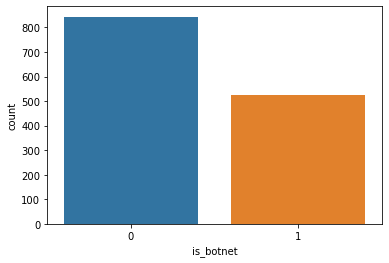

In [39]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.countplot(data= data, x = "is_botnet")
plt.show()

In [40]:
# Splitting the dataset into training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [41]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr= lr.fit(X_train, y_train)

In [42]:
y_pred = lr.predict(X_test)
print('Accuracy score= ', accuracy_score(y_test, y_pred))

Accuracy score=  0.6169590643274854


In [43]:
# SMOTE technique on train
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

In [44]:
from collections import Counter
print("Before SMOTE : ", Counter(y_train))
print("After SMOTE : ", Counter(y_train_smote))

Before SMOTE :  Counter({0: 640, 1: 385})
After SMOTE :  Counter({0: 640, 1: 640})


In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix
lr= lr.fit(X_train_smote, y_train_smote)
y_predict = lr.predict(X_test)
print(accuracy_score(y_test, y_predict))
confusion_matrix(y_test,y_predict)

0.5116959064327485


array([[ 50, 153],
       [ 14, 125]], dtype=int64)